# Amazon Reviews Scraping

In [1]:
# Import packages
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
# Header to set the requests as a browser requests
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9,bn;q=0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'
}

In [3]:
# URL of The amazon Review page
reviews_url ='https://www.amazon.in/Amazon-Brand-Symbol-Regular-CT-Single_Eden/product-reviews/B084BBS849/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [4]:
# Define Page No
len_page = 69

# Functions

In [5]:
#Extra Data as Html object from amazon Review page
def reviewsHtml(url, len_page):
    
    # Empty List define to store all pages html data
    soups = []
    
    # Loop for gather all 250 reviews from 25 pages via range
    for page_no in range(1, len_page + 1):
        
        # parameter set as page no to the requests body
        params = {
            'ie': 'UTF8',
            'reviewerType': 'all_reviews',
            'filterByStar': 'critical',
            'pageNumber': page_no,
        }
        
        # Request make for each page
        response = requests.get(url, headers=headers)
        
        # Save Html object by using BeautifulSoup4 and lxml parser
        soup = BeautifulSoup(response.text, 'lxml')
        
        # Add single Html page data in master soups list
        soups.append(soup)
        
    return soups

In [6]:
# Grab Reviews name, description, date, stars, title from HTML
def getReviews(html_data):

    # Create Empty list to Hold all data
    data_dicts = []
    
    # Select all Reviews BOX html using css selector
    boxes = html_data.select('div[data-hook="review"]')
    
    # Iterate all Reviews BOX 
    for box in boxes:
        
        # Select Name using css selector and cleaning text using strip()
        # If Value is empty define value with 'N/A' for all.
        try:
            name = box.select_one('[class="a-profile-name"]').text.strip()
        except Exception as e:
            name = 'N/A'

        try:
            stars = box.select_one('[data-hook="review-star-rating"]').text.strip().split(' out')[0]
        except Exception as e:
            stars = 'N/A'   

        try:
            title = box.select_one('[data-hook="review-title"]').text.strip()
        except Exception as e:
            title = 'N/A'

        try:
            date = box.select_one('[data-hook="review-date"]').text.strip().split(' on ')[-1]
        except Exception as e:
            date = 'N/A'

        try:
            description = box.select_one('[data-hook="review-body"]').text.strip()
        except Exception as e:
            description = 'N/A'

        # create Dictionary with al review data 
        data_dict = {
            'Name' : name,
            'Stars' : stars,
            'Title' : title,
            'Date' : date,
            'Description' : description
        }

        # Add Dictionary in master empty List
        data_dicts.append(data_dict)
    
    return data_dicts

# Data Process


In [7]:
# Grab all HTML
html_datas = reviewsHtml(reviews_url, len_page)

In [8]:
# Empty List to Hold all reviews data
reviews = []

In [9]:
# Iterate all Html page 
for html_data in html_datas:
    
    # Grab review data
    review = getReviews(html_data)
    
    # add review data in reviews empty list
    reviews += review

In [10]:
# Create a dataframe with reviews Data
df_reviews = pd.DataFrame(reviews)

In [11]:
df_reviews

,Name,Stars,Title,Date,Description
0,Twilight,5.0,5.0 out of 5 stars\nQuality perfect,6 February 2024,"I like the quality, fitting and stitchingThank..."
1,Sambaran D.,4.0,4.0 out of 5 stars\nAwesome!,2 February 2024,Didn’t expected that much of Great color and s...
2,syed,3.0,3.0 out of 5 stars\nQuality is ok at yhis pric...,8 June 2021,Size is not perfect
3,DharmendraMadhavi,5.0,5.0 out of 5 stars\nNice look parfect fitting,16 March 2024,Thankyou for cocoblu retail Ltd and Amazon
4,Nilesh,1.0,1.0 out of 5 stars\nLenth & colour.,23 October 2020,The length of the t-shirt is large. Front & ba...
...,...,...,...,...,...
685,Mohammad shazeb,4.0,4.0 out of 5 stars\nValue for money,12 August 2021,Value for money product!!The fabric of the T-s...
686,Ashish m dorugade,5.0,5.0 out of 5 stars\nMust try this colour,2 December 2021,1- quality good 👍2- fitting and stitching perf...
687,Amazon Customer,3.0,3.0 out of 5 stars\nGood but not fit,18 December 2021,Product is satisfactory. Not best
688,Tauseef Ahmad,4.0,4.0 out of 5 stars\nOrder a smaller size,16 February 2021,Awesome fabric & color. Fits great. The length...


In [12]:
# Save data
df_reviews.to_csv('reviews.csv', index=False)

# sentiment analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from nltk.classify import NaiveBayesClassifier
from cleantext import clean

In [14]:
review_data=pd.read_csv('reviews.csv')
review_data

,Name,Stars,Title,Date,Description
0,Twilight,5.0,5.0 out of 5 stars\nQuality perfect,6 February 2024,"I like the quality, fitting and stitchingThank..."
1,Sambaran D.,4.0,4.0 out of 5 stars\nAwesome!,2 February 2024,Didn’t expected that much of Great color and s...
2,syed,3.0,3.0 out of 5 stars\nQuality is ok at yhis pric...,8 June 2021,Size is not perfect
3,DharmendraMadhavi,5.0,5.0 out of 5 stars\nNice look parfect fitting,16 March 2024,Thankyou for cocoblu retail Ltd and Amazon
4,Nilesh,1.0,1.0 out of 5 stars\nLenth & colour.,23 October 2020,The length of the t-shirt is large. Front & ba...
...,...,...,...,...,...
685,Mohammad shazeb,4.0,4.0 out of 5 stars\nValue for money,12 August 2021,Value for money product!!The fabric of the T-s...
686,Ashish m dorugade,5.0,5.0 out of 5 stars\nMust try this colour,2 December 2021,1- quality good 👍2- fitting and stitching perf...
687,Amazon Customer,3.0,3.0 out of 5 stars\nGood but not fit,18 December 2021,Product is satisfactory. Not best
688,Tauseef Ahmad,4.0,4.0 out of 5 stars\nOrder a smaller size,16 February 2021,Awesome fabric & color. Fits great. The length...


In [15]:
df=pd.DataFrame(review_data['Description'])
df

,Description
0,"I like the quality, fitting and stitchingThank..."
1,Didn’t expected that much of Great color and s...
2,Size is not perfect
3,Thankyou for cocoblu retail Ltd and Amazon
4,The length of the t-shirt is large. Front & ba...
...,...
685,Value for money product!!The fabric of the T-s...
686,1- quality good 👍2- fitting and stitching perf...
687,Product is satisfactory. Not best
688,Awesome fabric & color. Fits great. The length...


# Removing emojies 

In [16]:
#!pip install emoji

In [17]:
import emoji

# Replace emojis with an empty string
df['Description'] = df['Description'].apply(lambda s: emoji.replace_emoji(s, ''))
df

,Description
0,"I like the quality, fitting and stitchingThank..."
1,Didn’t expected that much of Great color and s...
2,Size is not perfect
3,Thankyou for cocoblu retail Ltd and Amazon
4,The length of the t-shirt is large. Front & ba...
...,...
685,Value for money product!!The fabric of the T-s...
686,1- quality good 2- fitting and stitching perfe...
687,Product is satisfactory. Not best
688,Awesome fabric & color. Fits great. The length...


In [18]:
# Convert all strings in the 'Description' column to lowercase
df['Description'] = df['Description'].str.lower()
df

,Description
0,"i like the quality, fitting and stitchingthank..."
1,didn’t expected that much of great color and s...
2,size is not perfect
3,thankyou for cocoblu retail ltd and amazon
4,the length of the t-shirt is large. front & ba...
...,...
685,value for money product!!the fabric of the t-s...
686,1- quality good 2- fitting and stitching perfe...
687,product is satisfactory. not best
688,awesome fabric & color. fits great. the length...


# Using NLTK's SentimentIntensityAnalyzer

In [19]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [20]:
sentiments_using_SIA = df['Description'].apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Description
pos,552
neg,138


In [21]:
# Using TextBlob sentiment analyzer

In [22]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [23]:
sentiments_using_textblob = df['Description'].apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Description
pos,552
neg,138


In [24]:
df['sentiment']=sentiments_using_textblob
df

,Description,sentiment
0,"i like the quality, fitting and stitchingthank...",pos
1,didn’t expected that much of great color and s...,pos
2,size is not perfect,neg
3,thankyou for cocoblu retail ltd and amazon,pos
4,the length of the t-shirt is large. front & ba...,pos
...,...,...
685,value for money product!!the fabric of the t-s...,pos
686,1- quality good 2- fitting and stitching perfe...,pos
687,product is satisfactory. not best,neg
688,awesome fabric & color. fits great. the length...,pos


# Removing tweets with empty text

In [25]:
df = df[df['Description']!='']
df

,Description,sentiment
0,"i like the quality, fitting and stitchingthank...",pos
1,didn’t expected that much of great color and s...,pos
2,size is not perfect,neg
3,thankyou for cocoblu retail ltd and amazon,pos
4,the length of the t-shirt is large. front & ba...,pos
...,...,...
685,value for money product!!the fabric of the t-s...,pos
686,1- quality good 2- fitting and stitching perfe...,pos
687,product is satisfactory. not best,neg
688,awesome fabric & color. fits great. the length...,pos


In [26]:
# Dropping duplicate rows

In [27]:
df.drop_duplicates(subset=['Description'], keep=False)
df

,Description,sentiment
0,"i like the quality, fitting and stitchingthank...",pos
1,didn’t expected that much of great color and s...,pos
2,size is not perfect,neg
3,thankyou for cocoblu retail ltd and amazon,pos
4,the length of the t-shirt is large. front & ba...,pos
...,...,...
685,value for money product!!the fabric of the t-s...,pos
686,1- quality good 2- fitting and stitching perfe...,pos
687,product is satisfactory. not best,neg
688,awesome fabric & color. fits great. the length...,pos


# Removing Punctuations, Numbers and Special characters

In [28]:
df['Description'] = df['Description'].str.replace("[^a-zA-Z# ]", "")
df

C:\Users\rites\AppData\Local\Temp\ipykernel_6284\1411579327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description'] = df['Description'].str.replace("[^a-zA-Z# ]", "")


,Description,sentiment
0,i like the quality fitting and stitchingthank ...,pos
1,didnt expected that much of great color and so...,pos
2,size is not perfect,neg
3,thankyou for cocoblu retail ltd and amazon,pos
4,the length of the tshirt is large front back ...,pos
...,...,...
685,value for money productthe fabric of the tshir...,pos
686,quality good fitting and stitching perfect a...,pos
687,product is satisfactory not best,neg
688,awesome fabric color fits great the length is...,pos


In [29]:
# Removing Stop words

In [30]:
stopwords_set = set(stopwords.words('english'))
cleaned_reviews = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Description.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
df['Description'] = cleaned_reviews
df

,Description,sentiment
0,like quality fitting stitchingthank amazon,pos
1,didnt expected much great color soft material ...,pos
2,size perfect,neg
3,thankyou cocoblu retail ltd amazon,pos
4,length tshirt large front back lenth equal ima...,pos
...,...,...
685,value money productthe fabric tshirt quite dec...,pos
686,quality good fitting stitching perfect wash co...,pos
687,product satisfactory best,neg
688,awesome fabric color fits great length larger ...,pos


# Tokenize

In [31]:
tokenized_reviws = df['Description'].apply(lambda x: x.split())
tokenized_reviws

0       [like, quality, fitting, stitchingthank, amazon]
1      [didnt, expected, much, great, color, soft, ma...
2                                        [size, perfect]
3               [thankyou, cocoblu, retail, ltd, amazon]
4      [length, tshirt, large, front, back, lenth, eq...
                             ...                        
685    [value, money, productthe, fabric, tshirt, qui...
686    [quality, good, fitting, stitching, perfect, w...
687                        [product, satisfactory, best]
688    [awesome, fabric, color, fits, great, length, ...
689    [nice, colour, per, website, return, material,...
Name: Description, Length: 690, dtype: object

In [32]:
# Lemmatization

In [33]:
word_lemmatizer = WordNetLemmatizer()

In [34]:
tokenized_reviws = tokenized_reviws.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_reviws

0       [like, quality, fitting, stitchingthank, amazon]
1      [didnt, expected, much, great, color, soft, ma...
2                                        [size, perfect]
3               [thankyou, cocoblu, retail, ltd, amazon]
4      [length, tshirt, large, front, back, lenth, eq...
                             ...                        
685    [value, money, productthe, fabric, tshirt, qui...
686    [quality, good, fitting, stitching, perfect, w...
687                        [product, satisfactory, best]
688    [awesome, fabric, color, fit, great, length, l...
689    [nice, colour, per, website, return, material,...
Name: Description, Length: 690, dtype: object

# Joining all tokens into sentences

In [35]:
for i, tokens in enumerate(tokenized_reviws):
    tokenized_reviws[i] = ' '.join(tokens)

df['Description'] = tokenized_reviws
df

,Description,sentiment
0,like quality fitting stitchingthank amazon,pos
1,didnt expected much great color soft material ...,pos
2,size perfect,neg
3,thankyou cocoblu retail ltd amazon,pos
4,length tshirt large front back lenth equal ima...,pos
...,...,...
685,value money productthe fabric tshirt quite dec...,pos
686,quality good fitting stitching perfect wash co...,pos
687,product satisfactory best,neg
688,awesome fabric color fit great length larger s...,pos


In [36]:
# WordCloud

In [37]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [38]:
# Most common words in positive tweets

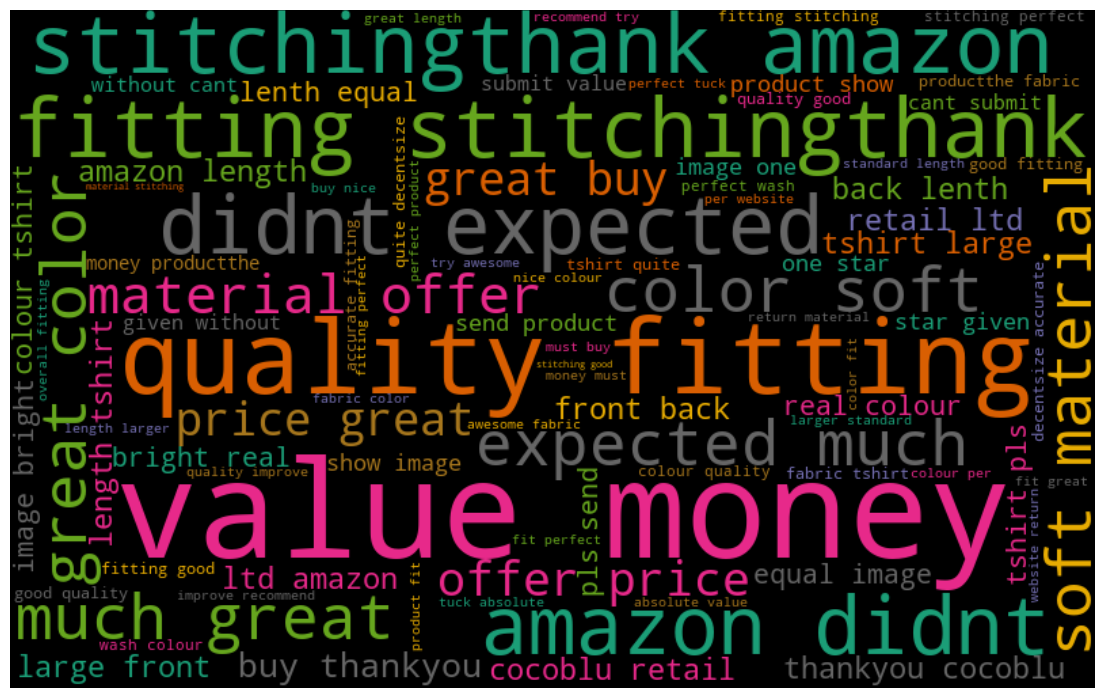

In [39]:
all_words = ' '.join([text for text in df['Description'][df.sentiment == 'pos']])
generate_wordcloud(all_words)

In [40]:
# Most common words in negative tweets

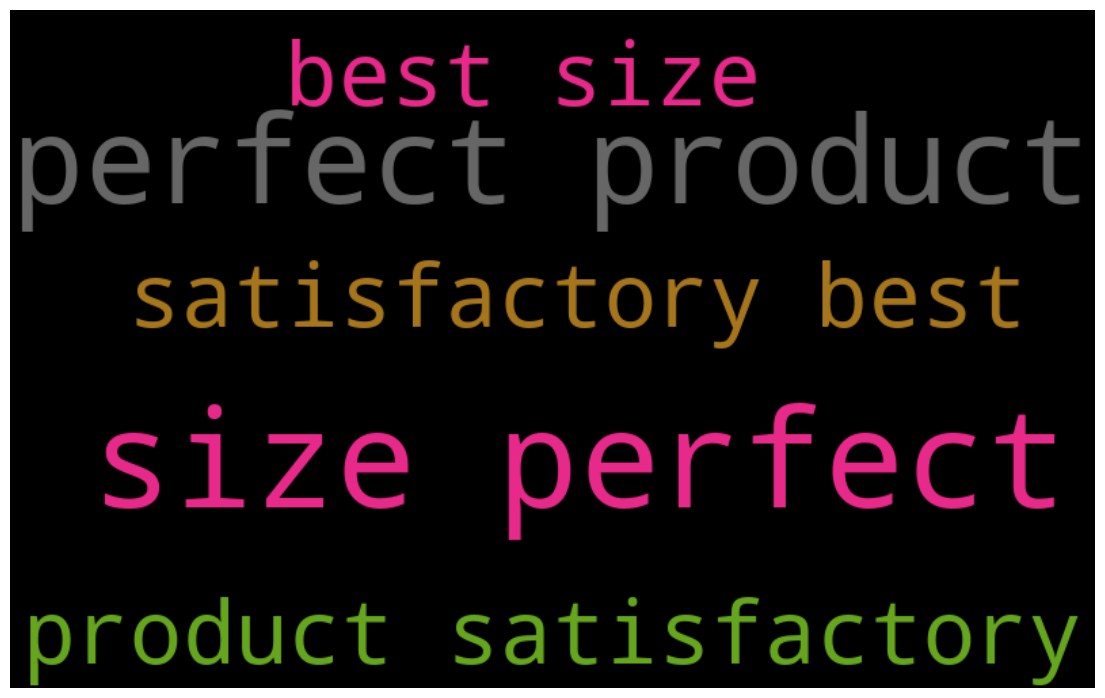

In [41]:
all_words = ' '.join([text for text in df['Description'][df['sentiment'] == 'neg']])
generate_wordcloud(all_words)

simple way to extract key phrases, by using TextBlob (ConllExtractor)

In [42]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in df.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.Description.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['quality fitting stitchingthank amazon'],
 ['much great color soft material offer price great'],
 [],
 ['thankyou cocoblu retail ltd amazon'],
 ['length tshirt large front',
  'lenth equal image bright real colour tshirt pls',
  'product show image one star'],
 ['value money productthe fabric tshirt'],
 ['quality good fitting stitching perfect wash colour quality'],
 [],
 ['awesome fabric color',
  'great length larger standard length',
  'overall fitting perfect product',
  'absolute value money'],
 ['nice colour', 'website return material stitching good']]

In [43]:
df['key_phrases'] = textblob_key_phrases
df

,Description,sentiment,key_phrases
0,like quality fitting stitchingthank amazon,pos,[quality fitting stitchingthank amazon]
1,didnt expected much great color soft material ...,pos,[much great color soft material offer price gr...
2,size perfect,neg,[]
3,thankyou cocoblu retail ltd amazon,pos,[thankyou cocoblu retail ltd amazon]
4,length tshirt large front back lenth equal ima...,pos,"[length tshirt large front, lenth equal image ..."
...,...,...,...
685,value money productthe fabric tshirt quite dec...,pos,[value money productthe fabric tshirt]
686,quality good fitting stitching perfect wash co...,pos,[quality good fitting stitching perfect wash c...
687,product satisfactory best,neg,[]
688,awesome fabric color fit great length larger s...,pos,"[awesome fabric color, great length larger sta..."


In [44]:
# For sake of consistency, we are going to discard the records which contains no phrases i.e where df['key_phrases'] contains []
df2 = df[df['key_phrases'].str.len()>0]

In [45]:
df2

,Description,sentiment,key_phrases
0,like quality fitting stitchingthank amazon,pos,[quality fitting stitchingthank amazon]
1,didnt expected much great color soft material ...,pos,[much great color soft material offer price gr...
3,thankyou cocoblu retail ltd amazon,pos,[thankyou cocoblu retail ltd amazon]
4,length tshirt large front back lenth equal ima...,pos,"[length tshirt large front, lenth equal image ..."
5,value money productthe fabric tshirt quite dec...,pos,[value money productthe fabric tshirt]
...,...,...,...
684,length tshirt large front back lenth equal ima...,pos,"[length tshirt large front, lenth equal image ..."
685,value money productthe fabric tshirt quite dec...,pos,[value money productthe fabric tshirt]
686,quality good fitting stitching perfect wash co...,pos,[quality good fitting stitching perfect wash c...
688,awesome fabric color fit great length larger s...,pos,"[awesome fabric color, great length larger sta..."


# Feature Extraction
We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

Bag of words (Simple vectorization)
TF-IDF (Term Frequency - Inverse Document Frequency)
We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

# A. Feature Extraction for 'Key Words'

In [46]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(df2['Description'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df2['Description'])

# B. Feature Extraction for 'Key Phrases'

In [47]:
phrase_sents = df2['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

# Model Building: Sentiment Analysis

# Map target variables to {0, 1}

In [48]:
target_variable = df2['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

In [49]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

In [50]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

In [ ]:
A. Predictions on 'key words' based features

In [ ]:
a. BOW word features

Accuracy Score - 1.0


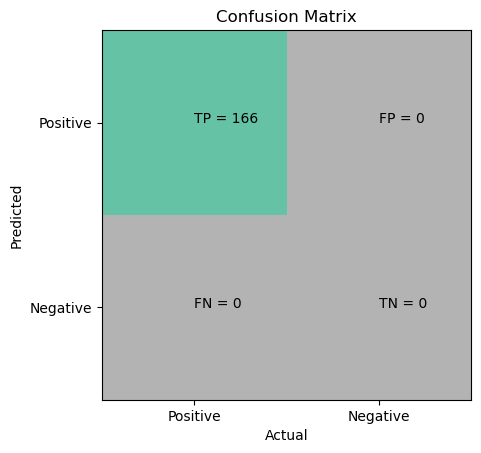

In [51]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

In [ ]:
b. TF-IDF word features

Accuracy Score - 1.0


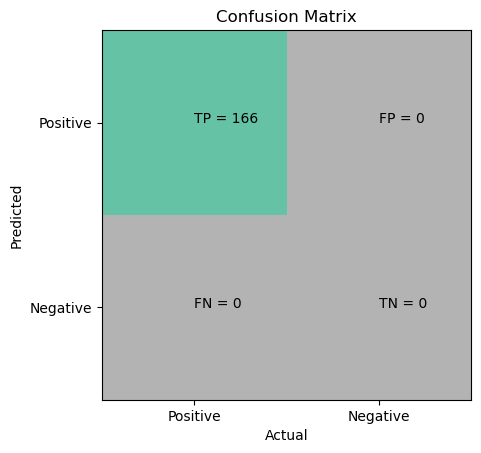

In [52]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

# B. Predictions on 'key phrases' based features

In [ ]:
a. BOW Phrase features

Accuracy Score - 1.0


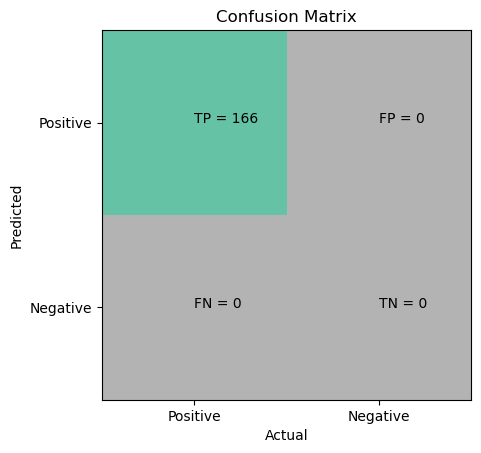

In [53]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

In [ ]:
b. TF-IDF Phrase feature

Accuracy Score - 1.0


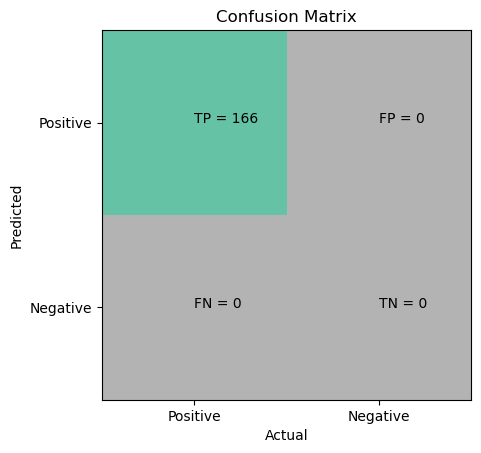

In [54]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

# Now lets try with the whole set

# A. Feature Extraction for 'Key Words'

In [55]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(df['Description'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df['Description'])

# B. Feature Extraction for 'Key Phrases'

In [56]:
phrase_sents = df['key_phrases'].apply(lambda x: ' '.join(x))

# BOW phrase features
bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

# TF-IDF phrase feature
tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

In [ ]:
# Model Building: Sentiment Analysis

In [ ]:
# Map target variables to {0, 1}

In [57]:
target_variable = df['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

In [ ]:
# A. Predictions on 'key words' based features

In [ ]:
# a. BOW word features

Accuracy Score - 1.0


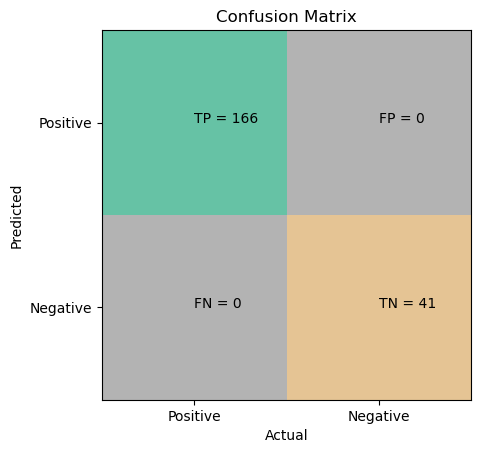

In [58]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

In [ ]:
# b. TF-IDF word features

Accuracy Score - 1.0


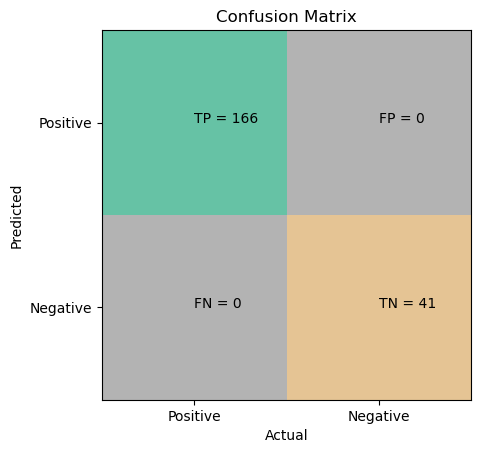

In [59]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

In [ ]:
# B. Predictions on 'key phrases' based features

In [ ]:
# a. BOW Phrase features

Accuracy Score - 1.0


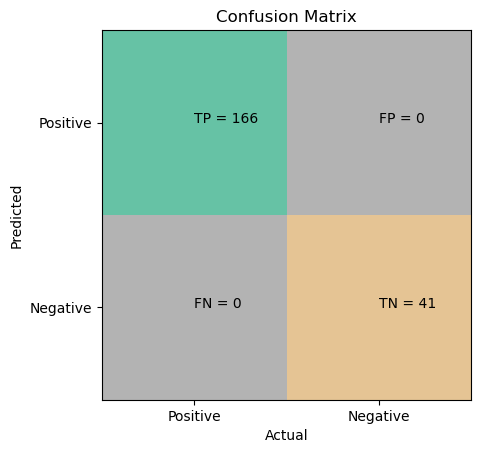

In [60]:
X_train, X_test, y_train, y_test = train_test_split(bow_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

In [ ]:
# b. TF-IDF Phrase features

Accuracy Score - 1.0


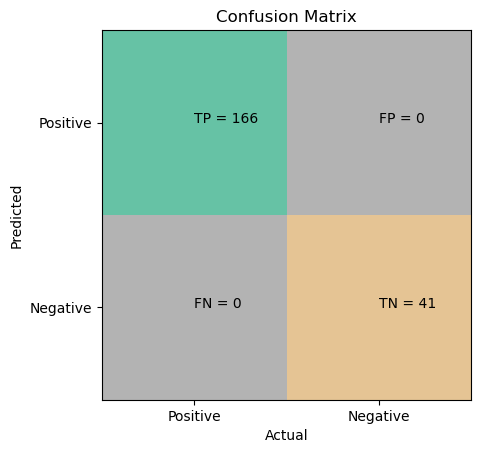

In [61]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_phrase_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)